In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
import glob
from PIL import Image

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.core import Flatten, Dense, Dropout, Lambda


Using TensorFlow backend.


In [2]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [3]:
from keras.preprocessing import image

BATCH_SIZE = 64
PATH="data_/"

def get_fit_sample():
    gen = image.ImageDataGenerator()
    sample_batches = gen.flow_from_directory(PATH+'valid', target_size=(224,224), 
            class_mode='categorical', shuffle=False, batch_size=200)
    imgs, labels = next(sample_batches)
    return imgs

gen = image.ImageDataGenerator(featurewise_std_normalization=True)
gen.fit(get_fit_sample())
val_batches = gen.flow_from_directory(PATH+'valid', target_size=(224,224), 
            class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

gen = image.ImageDataGenerator(featurewise_std_normalization=True, horizontal_flip=True, channel_shift_range=100, zoom_range=0.5)
gen.fit(get_fit_sample())
batches = gen.flow_from_directory(PATH+'train', target_size=(224,224), 
            class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

#imgs,labels = next(batches)
#plots(imgs[:2])


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 16997 images belonging to 2 classes.


In [4]:


CLASSES = 2
INPUT_SHAPE = (224,224,3)
model = Sequential()
    
# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', input_shape=INPUT_SHAPE))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# Classification block
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax', name='predictions'))

from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=0.0005, momentum=0.9, nesterov=False)


model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])

Epoch 1/10
100/100 [==============================] - 113s - loss: 0.2500 - acc: 0.5023 - val_loss: 0.2523 - val_acc: 0.4797
Epoch 2/10
100/100 [==============================] - 109s - loss: 0.2499 - acc: 0.5116 - val_loss: 0.2495 - val_acc: 0.4984
Epoch 3/10
100/100 [==============================] - 112s - loss: 0.2499 - acc: 0.5172 - val_loss: 0.2490 - val_acc: 0.5828
Epoch 4/10
100/100 [==============================] - 110s - loss: 0.2489 - acc: 0.5273 - val_loss: 0.2481 - val_acc: 0.5355
Epoch 5/10
100/100 [==============================] - 109s - loss: 0.2487 - acc: 0.5348 - val_loss: 0.2465 - val_acc: 0.5234
Epoch 6/10
100/100 [==============================] - 109s - loss: 0.2474 - acc: 0.5467 - val_loss: 0.2430 - val_acc: 0.5984
Epoch 7/10
100/100 [==============================] - 109s - loss: 0.2454 - acc: 0.5608 - val_loss: 0.2398 - val_acc: 0.5709
Epoch 8/10
100/100 [==============================] - 109s - loss: 0.2426 - acc: 0.5754 - val_loss: 0.2494 - val_acc: 0.5312


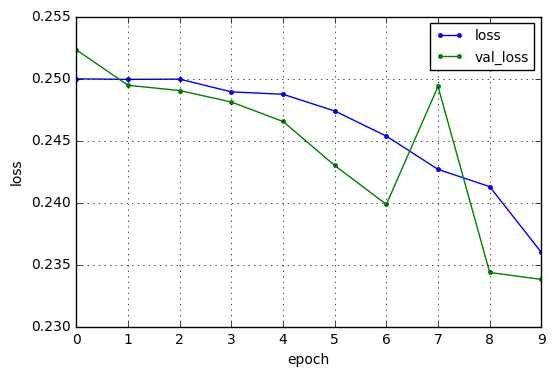

CPU times: user 17min 47s, sys: 2min 7s, total: 19min 54s
Wall time: 18min 27s


In [5]:
%%time
hist = model.fit_generator(batches,  steps_per_epoch=100, epochs=10, validation_data=val_batches, validation_steps=10)
 
model.save('ConvNet-D-vgg16-aug.h5')

# http://qiita.com/TypeNULL/items/4e4d7de11ab4361d6085
loss = hist.history['loss']
val_loss = hist.history['val_loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()